In [1]:
%load_ext autoreload
%autoreload 2

    
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from TraceGenerator import TraceDataGeneration, AutoGenerator, AutoGenerator_original
#from TraceDataGeneration_single_trace import TraceDataGeneration

In [2]:
function_list = ['constant',
                 'impulse_like',
                 'linear_transition',
                 'rectangular_pulse',
                 'step_like',
                 'trapezoidal',
                 'triangular']

import random

function_num = 4
para_num = 3

function_lists = [ [] for _ in range(para_num)]
for i in range(para_num):
    temp = []
    for j in range(function_num):
        temp.append(random.choice(function_list))
    function_lists[i] = temp



In [3]:
function_lists[0]

['step_like', 'triangular', 'constant', 'constant']

In [13]:
import random
function = []
for i in range(5):
    function.append(random.choice(function_list))

In [288]:
function

['triangular', 'linear_transition', 'triangular']

In [274]:
random.randint(1, 5)

5

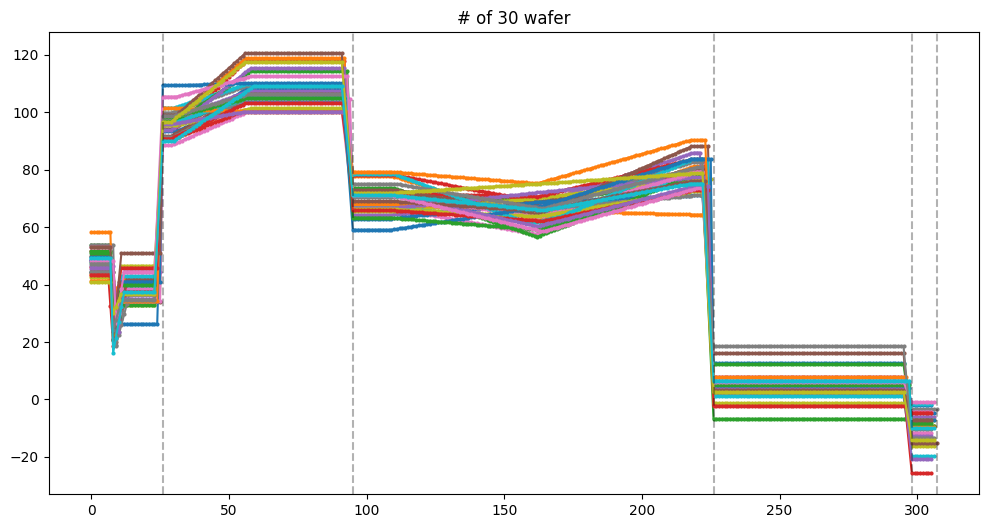

In [21]:
gen = AutoGenerator_original(n=30, max_value=100, min_value=0, function_list=function)
df = gen.generate_random_trace()
gen.trace_checker(df, marker=True)

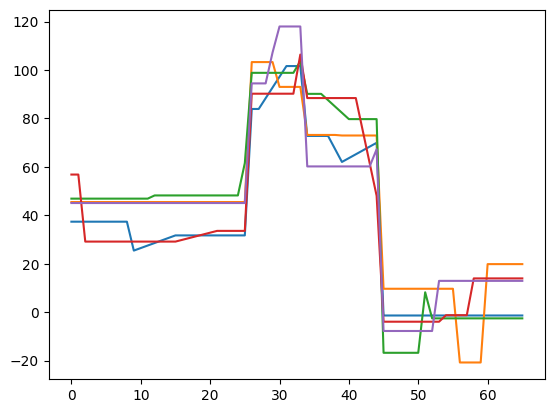

In [149]:
plt.plot(df[:,0])
plt.plot(df[:,1])
plt.plot(df[:,2])
plt.plot(df[:,3])
plt.plot(df[:,4])

In [160]:
df.head()

,Tool/Chamber,Tool,chamber,Process_Recipe,Start_Time,Carrier_ID,WAFER_ID,Slot,para1,para2,para3,para4
0,EP00018/PM-1,EP00018,PM-1,Process Recipe,2024-01-01 00:00:00.000,PFP00731,PFP00731.0,0,102.012360,21.837261,31.23624,100.691434
1,EP00018/PM-1,EP00018,PM-1,Process Recipe,2024-01-01 00:00:00.100,PFP00731,PFP00731.0,0,102.012360,21.837261,31.23624,100.691434
2,EP00018/PM-1,EP00018,PM-1,Process Recipe,2024-01-01 00:00:00.200,PFP00731,PFP00731.0,0,102.012360,21.837261,31.23624,100.691434
3,EP00018/PM-1,EP00018,PM-1,Process Recipe,2024-01-01 00:00:00.300,PFP00731,PFP00731.0,0,102.012360,21.837261,31.23624,100.691434
4,EP00018/PM-1,EP00018,PM-1,Process Recipe,2024-01-01 00:00:00.400,PFP00731,PFP00731.0,0,101.620962,21.837261,31.23624,100.691434


In [191]:
a = gen.default_parameter_generation()

In [193]:
a = [a]

In [207]:
a[0][0]['time1']

23

In [198]:
is_times = [t for t in a[0][0] if 'time' in t]
is_times

['time1', 'time2', 'time3']

In [212]:
gen = AutoGenerator(n=2, max_value=100, min_value=0, function_num=2, para_num=2)
df = gen.generate_random_trace()
#gen.trace_checker(df, marker=False)
show_generated_para(df)

(363,)


ValueError: cannot reshape array of size 363 into shape (2,newaxis)

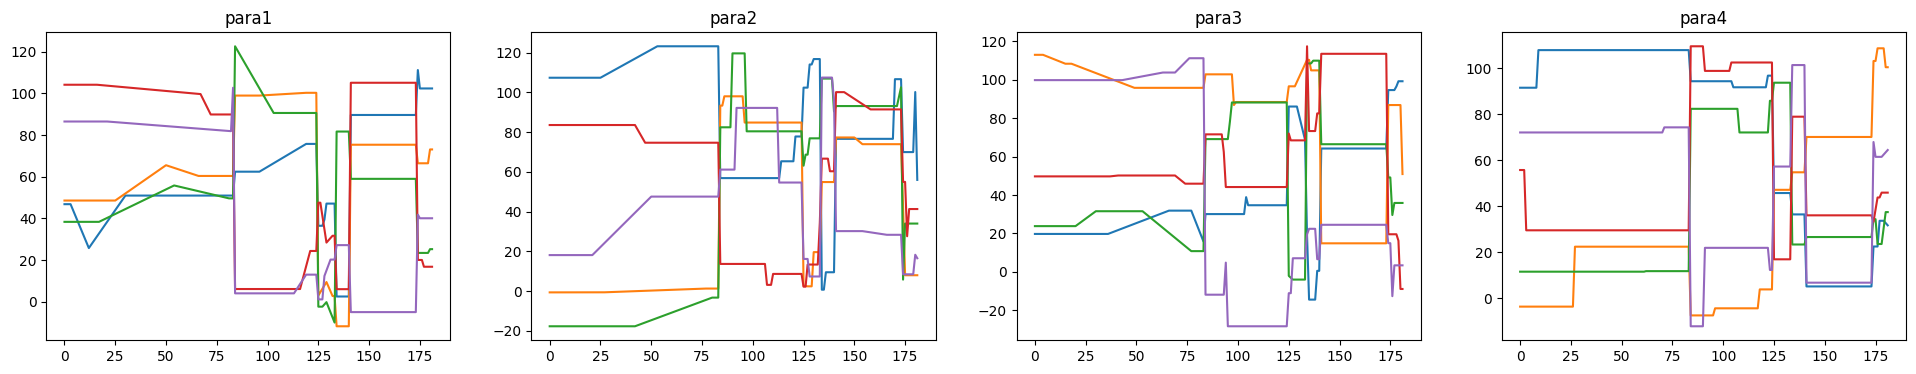

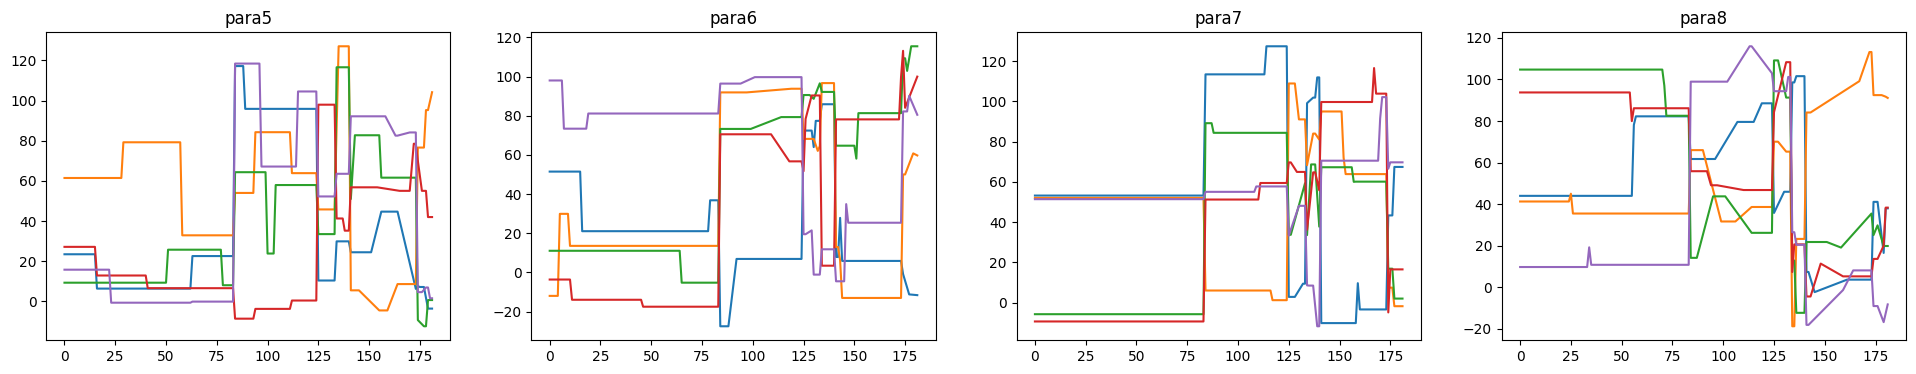

In [171]:
gen = AutoGenerator(n=5, max_value=100, min_value=0, function_num=6, para_num=8)
df = gen.generate_random_trace()
#gen.trace_checker(df, marker=False)
show_generated_para(df)

In [87]:
gen.function_lists

[['rectangular_pulse', 'rectangular_pulse', 'trapezoidal'],
 ['impulse_like', 'trapezoidal', 'triangular'],
 ['linear_transition', 'constant', 'step_like'],
 ['constant', 'triangular', 'step_like'],
 ['step_like', 'impulse_like', 'step_like'],
 ['trapezoidal', 'impulse_like', 'triangular'],
 ['linear_transition', 'triangular', 'linear_transition']]

In [79]:
from utils import *

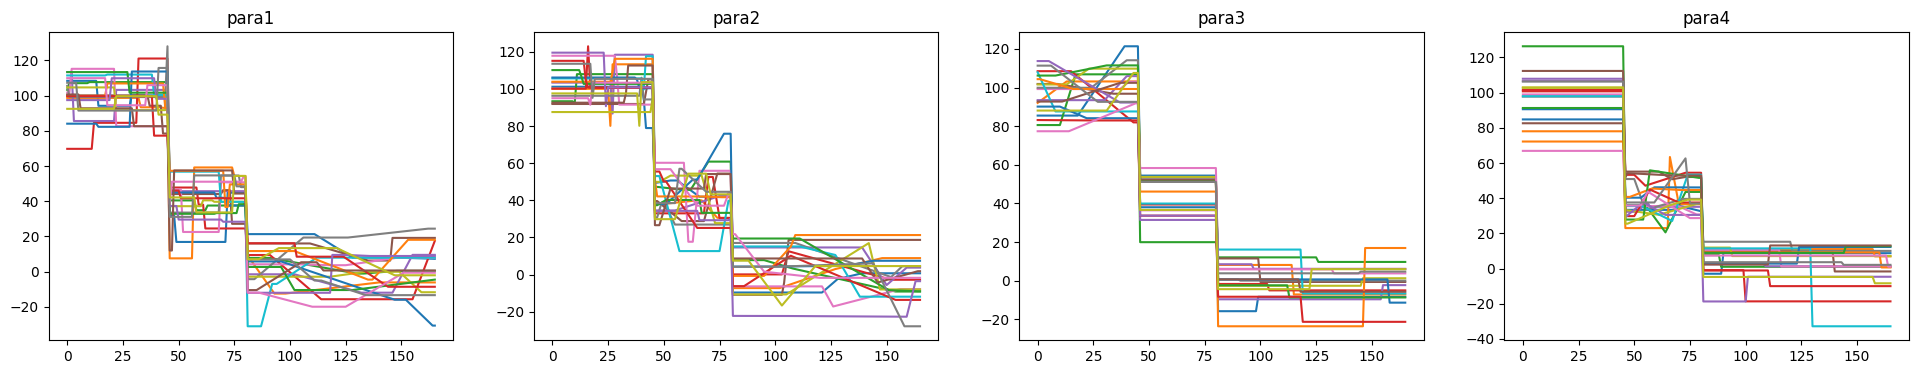

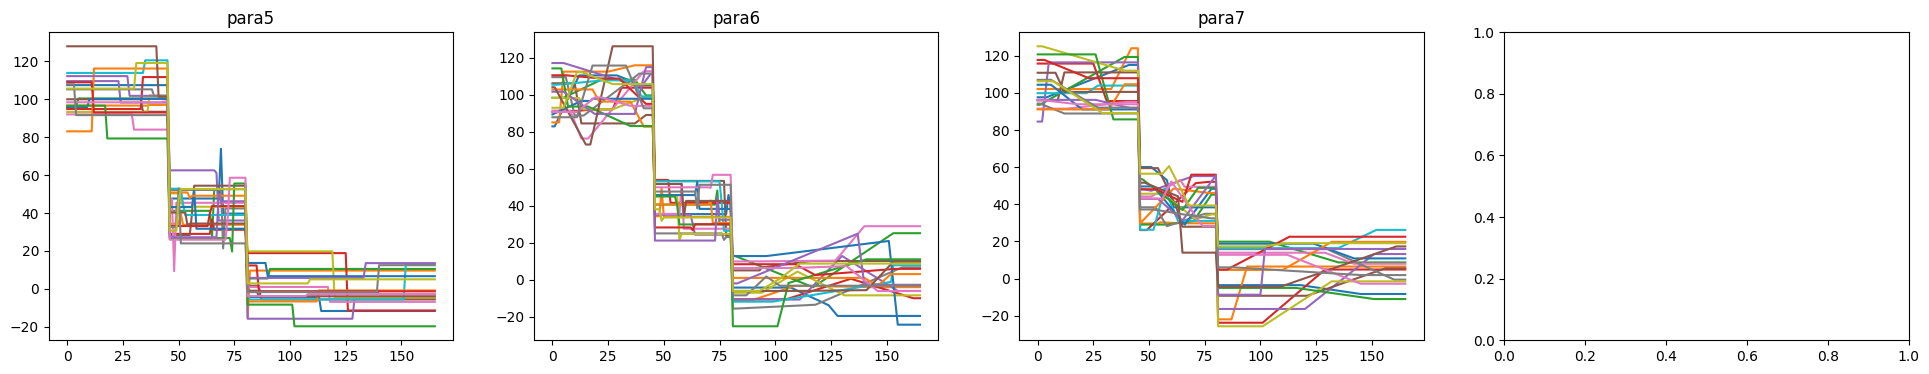

In [84]:
show_generated_para(df)

In [41]:
wafer_list

array(['PFP00731.0', 'PFP00731.1'], dtype=object)

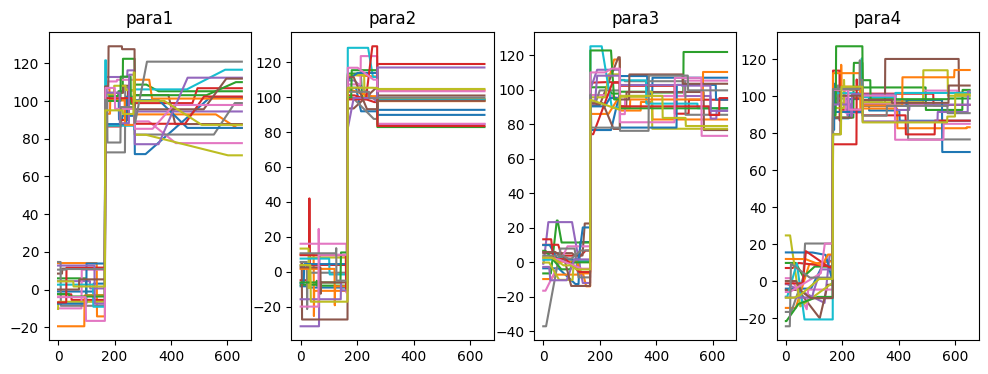

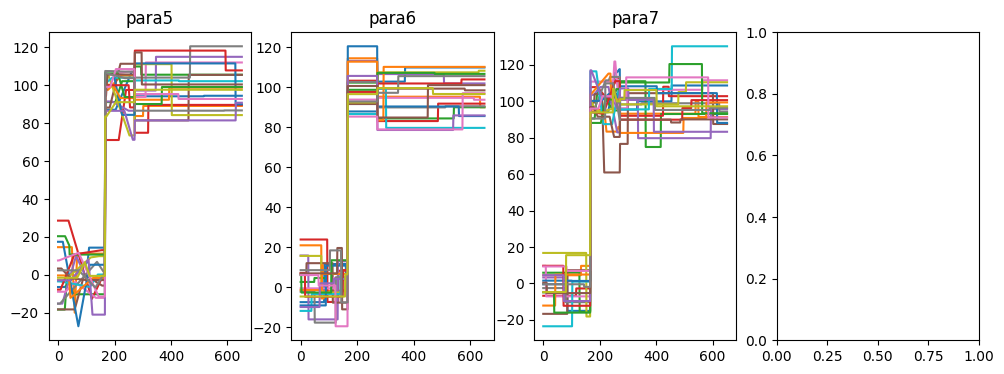

In [75]:
wafer_list = df['WAFER_ID'].unique()
para_col = [col for col in df.columns if 'para' in col]
image_col = 4
idx = 0
for key, para in enumerate(para_col):
    for wafer in wafer_list:
        new = df.groupby('WAFER_ID').get_group(wafer)
        if (key % image_col == 0) and (wafer == wafer_list[0]):
            #print(key)
            fig, ax = plt.subplots(1, image_col, figsize=(12,4))
        idx = key % 4
        ax[idx].plot(new[para])
        ax[idx].set_title(f'{para}')
    
        if (idx % image_col == image_col-1) and (wafer_list[-1] == wafer):
            plt.show()


In [50]:
df.columns[8:]

Index(['para1', 'para2', 'para3', 'para4'], dtype='object')

In [ ]:
param = 

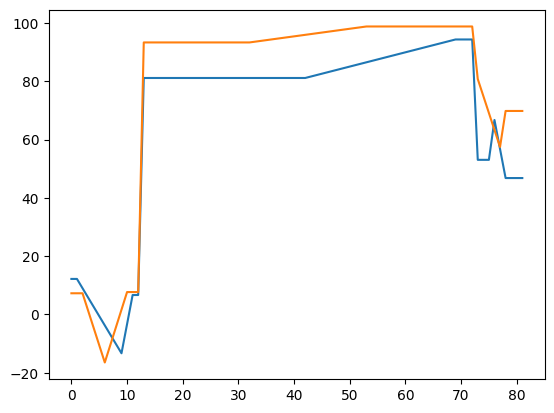

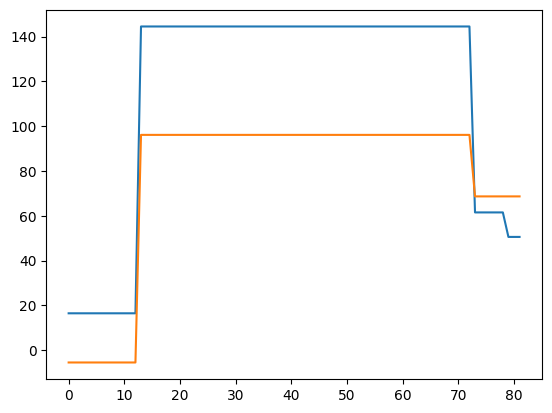

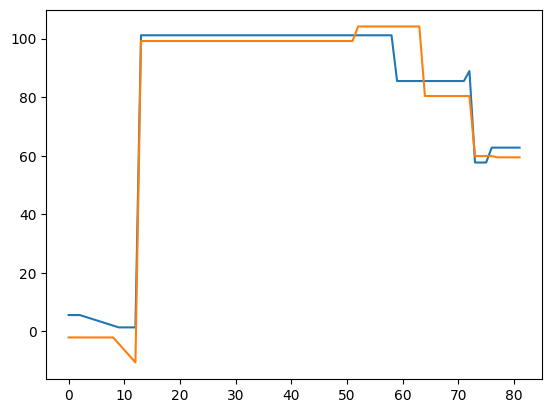

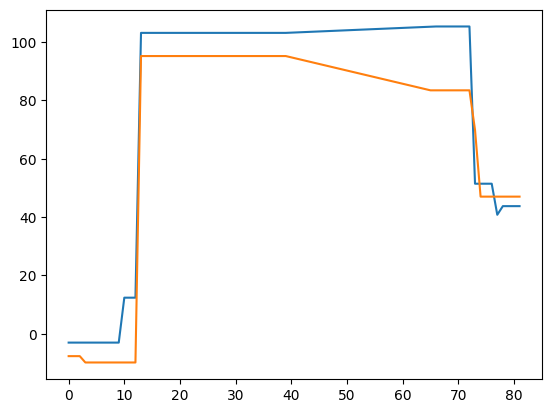

In [51]:
for p in df.columns[8:]:
    for idx, group in df.groupby('WAFER_ID'):
        plt.plot(group[p])
    plt.show()
        

In [402]:
gen.function_lists[2]

['linear_transition', 'rectangular_pulse', 'rectangular_pulse']

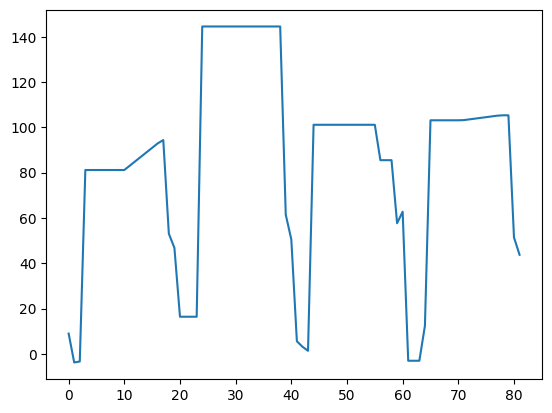

In [422]:
plt.plot(df[0][:,2])

In [362]:
np.concatenate(df[0])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [280]:
gen.default_parameter_generation()

[{'start_value': 20.743324522316815,
  'high_value': -10.347113282537357,
  'end_value': 5.571756051441343,
  'time1': 3,
  'time2': 27,
  'length': 161},
 {'start_value': 121.87708379279707,
  'high_value': 109.5545143522354,
  'end_value': 96.1126216158738,
  'time1': 6,
  'time2': 54,
  'time3': 75,
  'time4': 102,
  'length': 124},
 {'start_value': 62.60743440168859,
  'end_value': 51.61344703672449,
  'time1': 63,
  'time2': 80,
  'length': 176}]

In [275]:
gen = AutoGenerator(n=10, max_value=100, min_value=0, function=function)
df = gen.generate_random_trace()

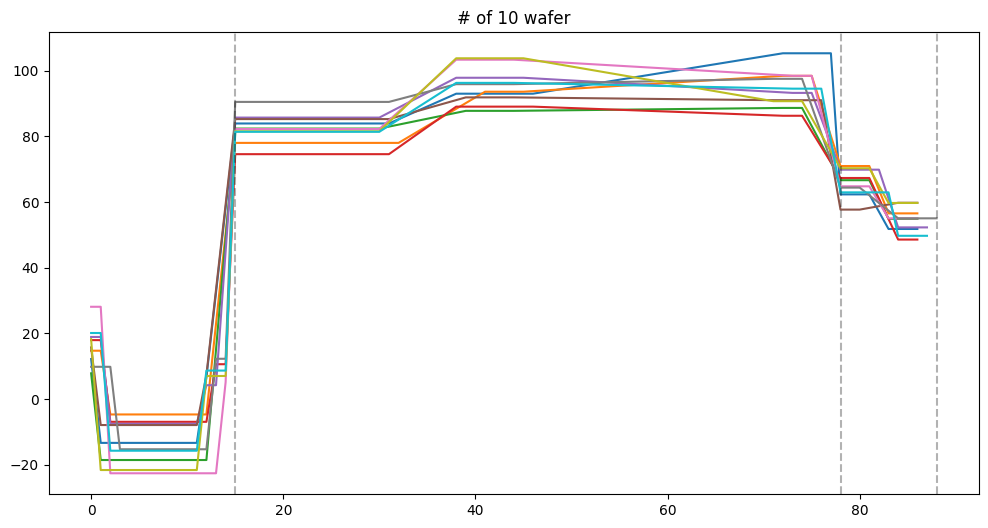

In [279]:
gen.trace_checker(df, marker=False)

In [58]:
df

,LOT_ID,WAFER_ID,PROCESS,PROCESS_STEP,RECIPE,RECIPE_STEP,PARAMETER_NAME,PARAMETER_VALUE,TIME
0,lot,wafer1,process,process_step,recipe,1,parameter_name,49.456458,2024-01-01 00:00:00
1,lot,wafer1,process,process_step,recipe,1,parameter_name,49.456458,2024-01-01 00:00:01
2,lot,wafer1,process,process_step,recipe,1,parameter_name,49.456458,2024-01-01 00:00:02
3,lot,wafer1,process,process_step,recipe,1,parameter_name,49.456458,2024-01-01 00:00:03
4,lot,wafer1,process,process_step,recipe,1,parameter_name,49.456458,2024-01-01 00:00:04
...,...,...,...,...,...,...,...,...,...
477,lot,wafer10,process,process_step,recipe,5,parameter_name,51.155172,2024-01-01 01:19:53
478,lot,wafer10,process,process_step,recipe,5,parameter_name,51.155172,2024-01-01 01:19:54
479,lot,wafer10,process,process_step,recipe,5,parameter_name,51.155172,2024-01-01 01:19:55
480,lot,wafer10,process,process_step,recipe,5,parameter_name,51.155172,2024-01-01 01:19:56


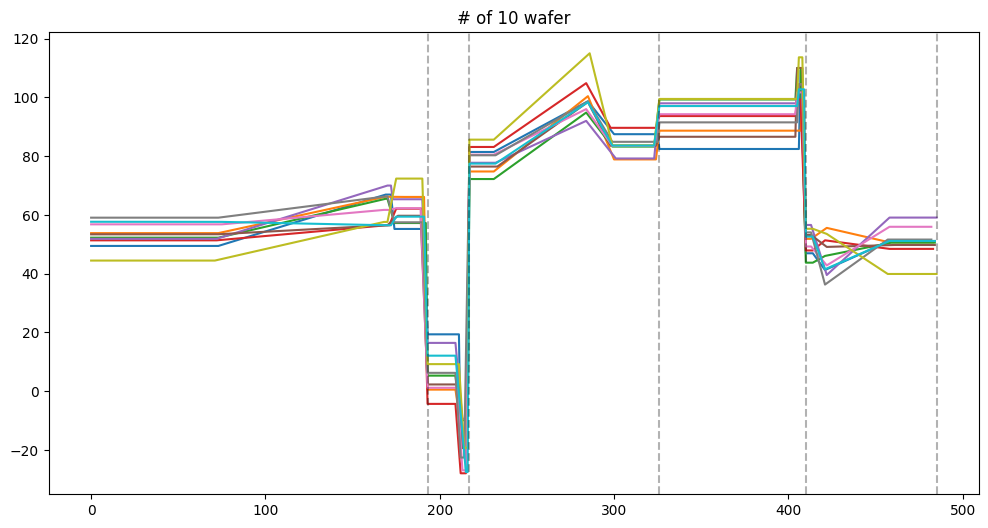

In [57]:
df, param = gen.generate_random_trace(return_param=True)
gen.trace_checker(df)

In [49]:
col = ['Tool/Chamber', 'Tool', 'chamber', 'Process_Recipe', 'Start_Time',
       'Carrier_ID', 'WAFER_ID', 'Slot']

In [50]:
df = pd.DataFrame([], columns=col)

In [55]:
df['Tool/Chamber'] = 'EP00018/PM-3'

In [56]:
df

,Tool/Chamber,Tool,chamber,Process_Recipe,Start_Time,Carrier_ID,WAFER_ID,Slot


In [16]:
wafer_id = df.WAFER_ID.unique()
wafer_list = []

for idx, group in df.groupby('WAFER_ID'):
    wafer_list.append(group)

In [19]:
wafer_list[0]

,LOT_ID,WAFER_ID,PROCESS,PROCESS_STEP,RECIPE,RECIPE_STEP,PARAMETER_NAME,PARAMETER_VALUE,TIME
0,lot,wafer1,process,process_step,recipe,1,parameter_name,45.968270,2024-01-01 00:00:00
1,lot,wafer1,process,process_step,recipe,1,parameter_name,45.968270,2024-01-01 00:00:01
2,lot,wafer1,process,process_step,recipe,1,parameter_name,48.050112,2024-01-01 00:00:02
3,lot,wafer1,process,process_step,recipe,1,parameter_name,50.131953,2024-01-01 00:00:03
4,lot,wafer1,process,process_step,recipe,1,parameter_name,50.131953,2024-01-01 00:00:04
...,...,...,...,...,...,...,...,...,...
95,lot,wafer1,process,process_step,recipe,5,parameter_name,87.416900,2024-01-01 00:01:35
96,lot,wafer1,process,process_step,recipe,5,parameter_name,87.416900,2024-01-01 00:01:36
97,lot,wafer1,process,process_step,recipe,5,parameter_name,87.416900,2024-01-01 00:01:37
98,lot,wafer1,process,process_step,recipe,5,parameter_name,87.416900,2024-01-01 00:01:38


In [13]:
param[3]

[{'start_value': 53.55766393802997, 'length': 41},
 {'start_value': 61.11683608595877,
  'peak_value': 58.86341052448591,
  'end_value': 34.167040539560844,
  'time1': 11,
  'length': 55},
 {'start_value': 2.305438722922945,
  'end_value': -1.94546908036369,
  'time1': 1,
  'length': 21},
 {'start_value': 103.7144866106538,
  'peak_value': 103.95017261984613,
  'end_value': 91.80197769248126,
  'time1': 3,
  'length': 48},
 {'start_value': 4.507957203892628,
  'high_value': 5.983603693734196,
  'end_value': -3.540516742217952,
  'time1': 2,
  'time2': 3,
  'time3': 4,
  'time4': 5,
  'length': 29}]

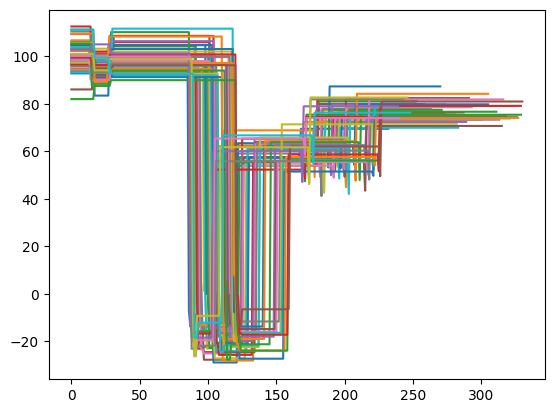

In [372]:
for i in df_list:
    plt.plot(i.PARAMETER_VALUE)

In [346]:
maximum_point = 5

value = np.random.normal(1)
intervals = np.linspace(-3, 3, maximum_point*2+1)
jitter_score = list(range(-maximum_point+1, 1)) + list(range(0, maximum_point))

idx = np.searchsorted(intervals, value, side='right')

In [347]:
# less than 3
if idx == 0:
    return jitter_score[0] - 1
# grater than 3
elif idx == len(intervals):
    return jitter_score[-1] + 1
else:
    return jitter_score[idx - 1]

SyntaxError: 'return' outside function (2085814120.py, line 3)

In [331]:
jitter_value_calculation(5)

0

In [202]:
for key, f in enumerate(function):
    #func = getattr(self, f)
    is_values = [v for v in gen.param[key] if 'value' in v]
    print(is_values)
    
    #generate_value_parameter(self, key, is_values, std_factor=0.1)

['start_value', 'high_value', 'end_value']


In [196]:
gen.param

[{'start_value': 86.23427409636722,
  'high_value': 88.92119915971242,
  'end_value': 103.53674547241599,
  'time1': 5,
  'time2': 55,
  'length': 68},
 {'start_value': -8.62131031457431,
  'high_value': 2.6286358649229467,
  'end_value': 23.933696532438276,
  'time1': 2,
  'time2': 153,
  'length': 233},
 {'start_value': 33.26815956117741,
  'peak_value': 37.33136986975491,
  'end_value': 10.176311294014827,
  'time1': 38,
  'length': 49}]

In [120]:
gen.generate_length()

79

In [186]:
def generate_numbers(num_function):
    target_recipe_step = random.randint(1, num_function)
    print(target_recipe_step)
    if target_recipe_step == num_function:
        return 1
    result = [0] 
    # 리스트의 길이가 1 이상이고, 원하는 합계가 양수인 경우에만 작동
    if target_recipe_step <= 0 or num_function <= 0:
        return result
    
    for _ in range(target_recipe_step - 1):
        # 남은 합계 중에서 랜덤한 숫자를 생성
        num = random.randint(1, num_function - (target_recipe_step - len(result)))
        # 리스트에 추가
        result.append(num)
        # 합계 업데이트
        num_function -= num
    
    # 마지막 숫자는 남은 합계
    result.append(num_function)
    
    return result

# 테스트
num_function = 6
result = generate_numbers(num_function)
print(result)  # 예: [2, 3, 1]

4
[0, 3, 1, 1, 1]


In [ ]:
def generate_numbers(num_function):
    target_recipe_step = random.randint(1, num_function)
    print(target_recipe_step)
    if target_recipe_step == num_function:
        return 1
    result = [0] 
    # 리스트의 길이가 1 이상이고, 원하는 합계가 양수인 경우에만 작동
    if target_recipe_step <= 0 or num_function <= 0:
        return result
    
    for _ in range(target_recipe_step - 1):
        # 남은 합계 중에서 랜덤한 숫자를 생성
        num = random.randint(1, num_function - (target_recipe_step - len(result)))
        # 리스트에 추가
        result.append(num)
        # 합계 업데이트
        num_function -= num
    
    # 마지막 숫자는 남은 합계
    result.append(num_function)
    
    return result

# 테스트
num_function = 6
result = generate_numbers(num_function)
print(result)  # 예: [2, 3, 1]

a = []
for i, j in zip(result[0:-1], result[1:]):
    a.append(function[i:j])

In [91]:
gen = AutoGenerator(n=3, max_value=100, min_value=0, function=function)

In [92]:
param = gen.random_parameter_generation()

In [9]:
import numpy as np

def get_lengths(arr):
    return np.array([len(item) for item in arr])

# 예제 리스트
example_list = [[1, 2, 3], [4, 5], [6, 7, 8, 9]]

# 함수 호출
result = get_lengths(example_list)
print(result)  # 출력: [3 2 4]

[3 2 4]


In [95]:
trace = gen.generate_trace()

In [96]:
trace

,LOT_ID,WAFER_ID,PROCESS,PROCESS_STEP,RECIPE,RECIPE_STEP,PARAMETER_NAME,PARAMETER_VALUE,TIME
0,lot,wafer1,process,process_step,recipe,1,parameter_name,107.850001,2024-01-01 00:00:00
1,lot,wafer1,process,process_step,recipe,1,parameter_name,103.966751,2024-01-01 00:00:01
2,lot,wafer1,process,process_step,recipe,1,parameter_name,107.274332,2024-01-01 00:00:02
3,lot,wafer1,process,process_step,recipe,1,parameter_name,103.835427,2024-01-01 00:00:03
4,lot,wafer1,process,process_step,recipe,1,parameter_name,109.072859,2024-01-01 00:00:04
...,...,...,...,...,...,...,...,...,...
53,lot,wafer3,process,process_step,recipe,2,parameter_name,96.409451,2024-01-01 00:02:49
54,lot,wafer3,process,process_step,recipe,3,parameter_name,-13.652353,2024-01-01 00:02:50
55,lot,wafer3,process,process_step,recipe,3,parameter_name,0.392853,2024-01-01 00:02:51
56,lot,wafer3,process,process_step,recipe,3,parameter_name,-0.663884,2024-01-01 00:02:52


[26 54 57]


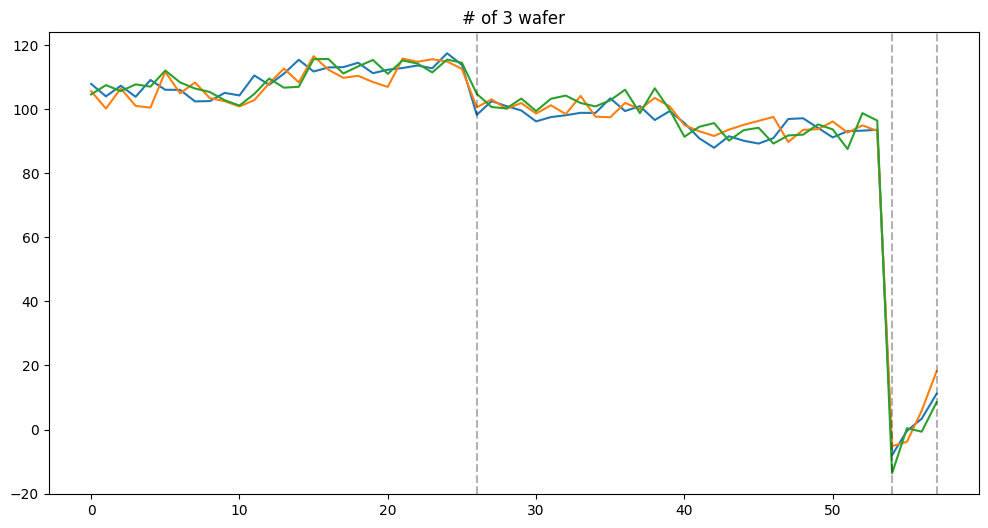

In [97]:
gen.trace_checker(trace)

In [14]:
def get_lengths(arr):
    return np.array([len(item) for item in arr])
length = get_lengths(trace[0])#length_function)

In [15]:
length

array([ 1,  9, 17])

In [23]:
len(np.concatenate(trace[0]))

27

In [25]:
np.cumsum(single_trace_step_lenght)

array([ 1, 10, 27])

In [26]:
col = ['LOT_ID', 'WAFER_ID', 'PROCESS', 'PROCESS_STEP', 'RECIPE', 'RECIPE_STEP', 'PARAMETER_NAME',
       'PARAMETER_VALUE', 'TIME']

In [51]:
data = []
for num, single in enumerate(trace):
    df = pd.DataFrame([], columns=col)
    df.PARAMETER_VALUE = np.concatenate(single)
    df['LOT_ID'] = 'lot'
    df['WAFER_ID'] = f'wafer{num+1}'
    df['PROCESS'] = 'process'
    df['PROCESS_STEP'] = 'process_step'
    df['RECIPE'] = 'recipe'
    df['PARAMETER_NAME'] = 'parameter_name'
    step_list = []
    # for step_num, step in enumerate(single):
    #     recipe_step = [str(step_num+1)] * len(step)
    #     step_list.extend(recipe_step)
    df['RECIPE_STEP'] = [str(step_num+1) for step_num, step in enumerate(single) for _ in step]
    data.append(df)
data = pd.concat(data)
data['TIME'] = pd.date_range("2024-01-01", periods=data.shape[0], freq="S")

In [50]:
[str(step_num+1) for step_num, step in enumerate(single) for _ in step]

['1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3']

In [49]:
data = []
date_range = pd.date_range("2024-01-01", periods=sum(len(single) for single in trace), freq="S")

for num, single in enumerate(trace):
    df = pd.DataFrame({'PARAMETER_VALUE': np.concatenate(single),
                       'LOT_ID': ['lot'] * len(single),
                       'WAFER_ID': [f'wafer{num+1}'] * len(single),
                       'PROCESS': ['process'] * len(single),
                       'PROCESS_STEP': ['process_step'] * len(single),
                       'RECIPE': ['recipe'] * len(single),
                       'PARAMETER_NAME': ['parameter_name'] * len(single),
                       'RECIPE_STEP': [str(step_num+1) for step_num, step in enumerate(single) for _ in step]})
    data.append(df)

data = pd.concat(data)
data['TIME'] = date_range

ValueError: All arrays must be of the same length

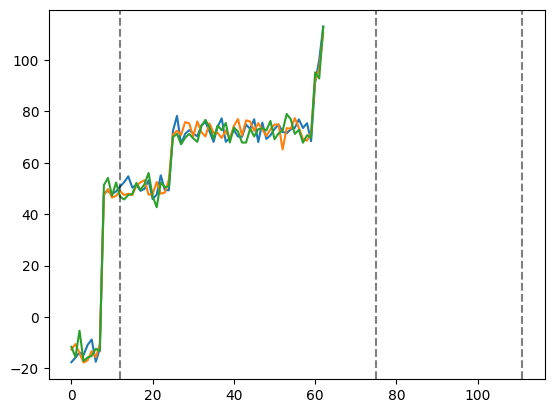

In [23]:
for t in trace:
    tt = np.concatenate(t)
    plt.plot(tt)
for v in [12, 12+63, 36+12+63]:
    plt.axvline(v, linestyle='--', alpha=0.5, color='black')
plt.show()